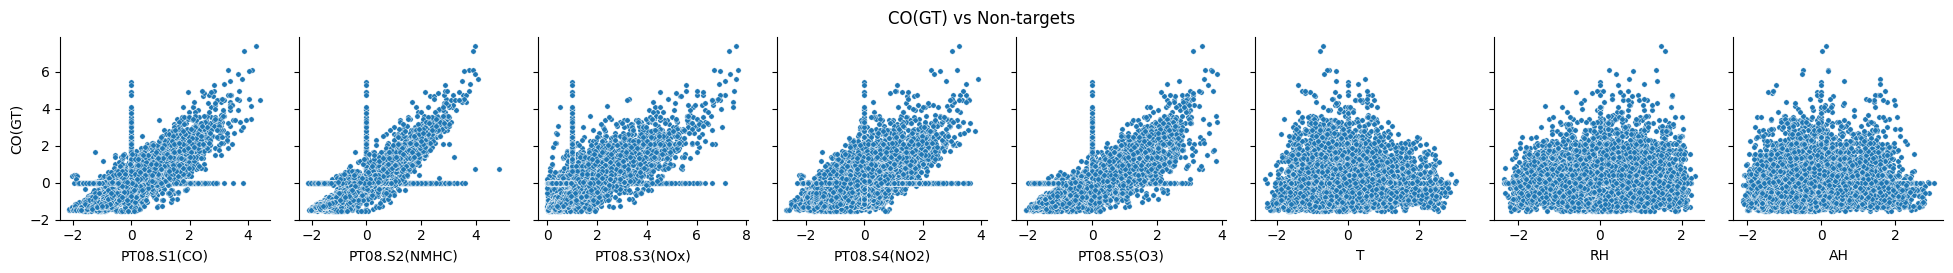

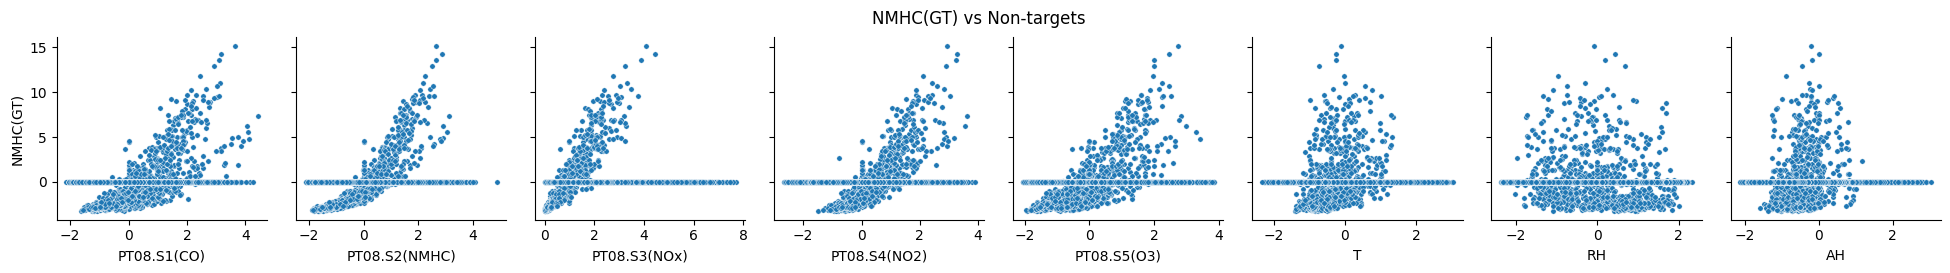

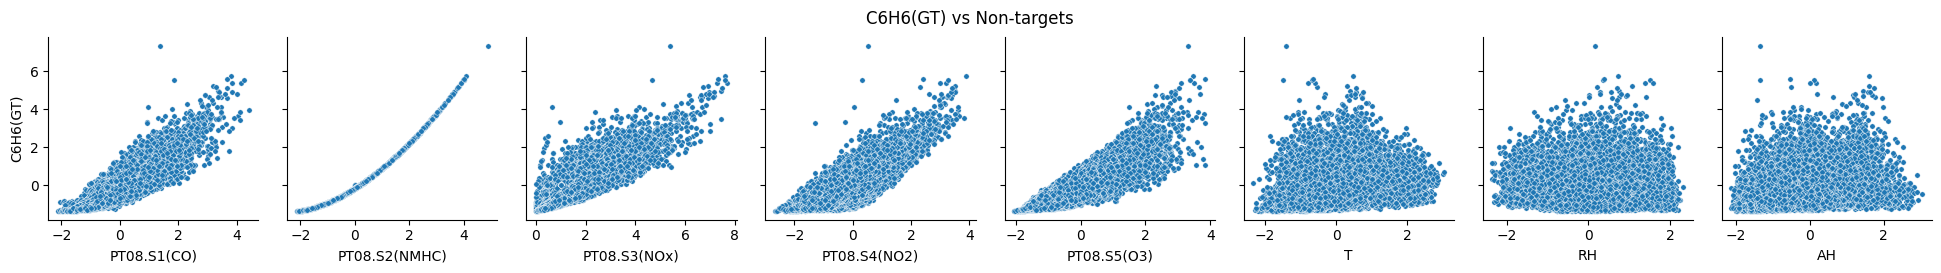

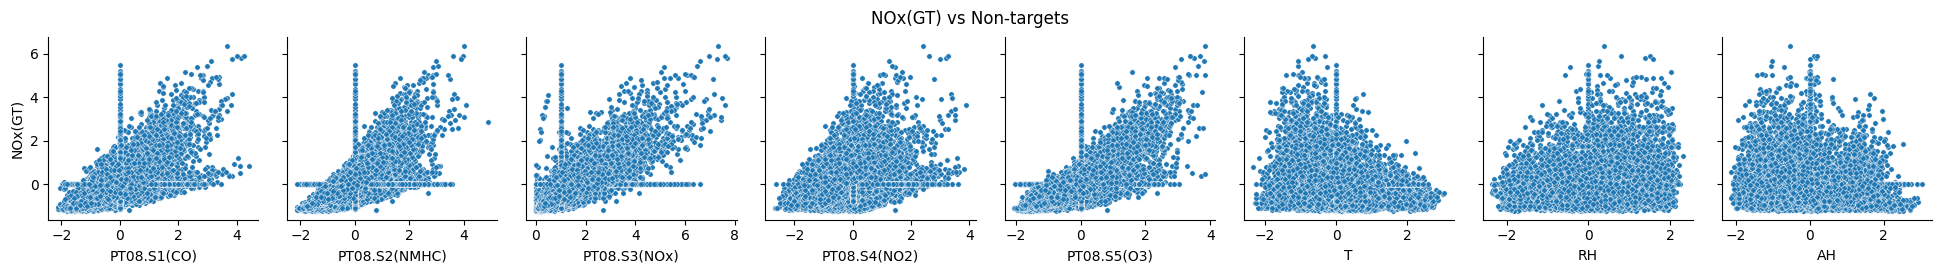

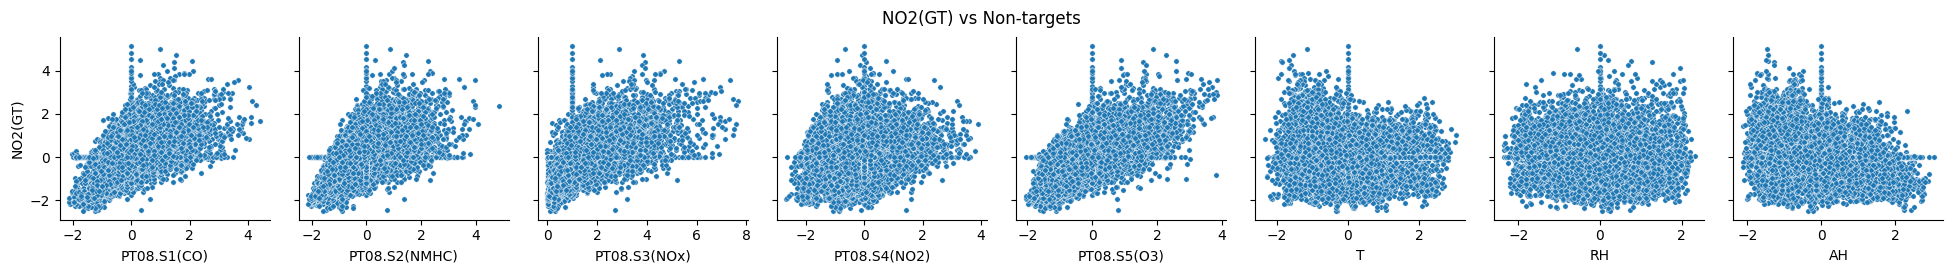

In [6]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
eda_dpp_utils = importlib.import_module('eda_dpp_utils')

df, df_unnormalised, numeric_cols = eda_dpp_utils.preProcessing()

def normalTrans(arr):
    return 1/np.sqrt(2*np.pi*df[x].std()) * np.exp(- np.power((df[x] - df[x].mean()) /(df[x].std()), 2) / 2)

x = 'PT08.S3(NOx)'
df['PT08.S3(NOx)'] = np.exp(- df['PT08.S3(NOx)'])
targets = [c for c in df.columns if '(GT)' in c].copy()
eda_dpp_utils.scatter_targetNontarget(df, targets)


In [7]:
# Lagged variables
targets = [c for c in df.columns if '(GT)' in c]

# Create lagged features up to lag 3
for tgt in targets:
    for lag in range(1, 4):
        df[f'{tgt}_lag{lag}'] = df[tgt].shift(lag)

# Compute correlations between each lagged feature and its respective target
for tgt in targets:
    print(f'\nCorrelations for {tgt}:')
    for lag in range(1, 4):
        corr = df[[tgt, f'{tgt}_lag{lag}']].corr().iloc[0,1]
        print(f'  {tgt}_lag{lag}: {corr:.3f}')
        



Correlations for CO(GT):
  CO(GT)_lag1: 0.814
  CO(GT)_lag2: 0.587
  CO(GT)_lag3: 0.418

Correlations for NMHC(GT):
  NMHC(GT)_lag1: 0.771
  NMHC(GT)_lag2: 0.479
  NMHC(GT)_lag3: 0.283

Correlations for C6H6(GT):
  C6H6(GT)_lag1: 0.836
  C6H6(GT)_lag2: 0.611
  C6H6(GT)_lag3: 0.434

Correlations for NOx(GT):
  NOx(GT)_lag1: 0.875
  NOx(GT)_lag2: 0.744
  NOx(GT)_lag3: 0.625

Correlations for NO2(GT):
  NO2(GT)_lag1: 0.846
  NO2(GT)_lag2: 0.716
  NO2(GT)_lag3: 0.587


CO(GT)      0
NMHC(GT)    0
C6H6(GT)    0
NOx(GT)     0
NO2(GT)     0
dtype: int64
CO(GT)      128
NMHC(GT)    434
C6H6(GT)    408
NOx(GT)     955
NO2(GT)     325
dtype: int64
0
Explained variance ratio per PC:
 [0.54042842 0.23719905 0.14437429 0.04244309 0.01454672 0.01108949
 0.00617959 0.00373936]
Cumulative explained variance:
 [0.54042842 0.77762747 0.92200175 0.96444484 0.97899155 0.99008105
 0.99626064 1.        ]


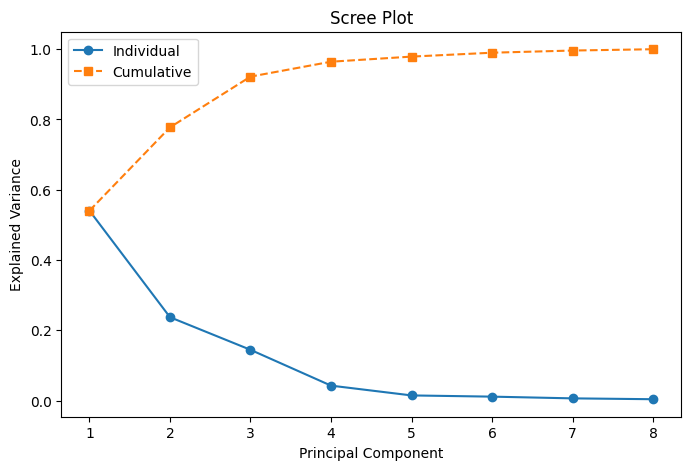

PCA Loadings:
      PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)  \
PC1     0.470259       0.474993     -0.445199      0.373070     0.440366   
PC2    -0.147895       0.003663      0.012729      0.197602    -0.196313   
PC3    -0.100595      -0.189030     -0.069777      0.167842    -0.136839   
PC4     0.272029       0.100428      0.772786      0.552335    -0.063296   
PC5     0.329047      -0.239871      0.357317     -0.499554     0.580884   
PC6     0.749490      -0.273051     -0.168788     -0.143354    -0.552666   
PC7     0.006941       0.752589      0.206405     -0.459320    -0.285209   
PC8    -0.053010      -0.173391     -0.028283      0.086305     0.143518   

            T        RH        AH  
PC1  0.083139  0.012039  0.121968  
PC2  0.673124 -0.594349  0.306626  
PC3  0.078285  0.592828  0.738113  
PC4 -0.058854  0.063506 -0.046247  
PC5  0.187754 -0.076543  0.280041  
PC6  0.075278 -0.002423 -0.059638  
PC7  0.212497  0.222331  0.063661  
PC8  0.66657

/var/folders/h3/srj0ks150b74jtpr2zl0w3d40000gn/T/ipykernel_79709/680348403.py:49: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_train_orig = y_train_orig.apply(pd.to_numeric, errors='coerce').fillna(method='ffill').fillna(method='bfill')
/var/folders/h3/srj0ks150b74jtpr2zl0w3d40000gn/T/ipykernel_79709/680348403.py:66: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_train_orig = y_train_orig.apply(pd.to_numeric, errors='coerce').fillna(method='ffill').fillna(method='bfill')


In [ ]:
# PCA with non targets
df, df_unnormalised, numeric_cols = eda_dpp_utils.preProcessing()

non_target_cols = [c for c in df.select_dtypes(include='number').columns 
                   if '(GT)' not in c and c not in ['hour', 'weekday', 'month', 'timestamp']]

n = len(df)
train_size = int(0.8 * n)
X_train = df.iloc[:train_size][non_target_cols].copy()
y_train = df.iloc[:train_size][[c for c in df.columns if '(GT)' in c]].copy()


pca = PCA()
X_pca = pca.fit_transform(X_train)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained variance ratio per PC:\n", explained_variance)
print("Cumulative explained variance:\n", cumulative_variance)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'o-', label='Individual')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 's--', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.legend()
plt.show()

loadings = pd.DataFrame(
    pca.components_,
    columns=X_train.columns,
    index=[f'PC{i+1}' for i in range(X_train.shape[1])]
)
print("PCA Loadings:\n", loadings)

y_train_orig = df_unnormalised.iloc[:train_size][[c for c in df_unnormalised.columns if '(GT)' in c]].copy()
y_train_orig = y_train_orig.apply(pd.to_numeric, errors='coerce').fillna(method='ffill').fillna(method='bfill')

pc_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_train.shape[1])])
pc_df.reset_index(drop=True, inplace=True)

y_train_orig = df_unnormalised.iloc[:train_size][[c for c in df_unnormalised.columns if '(GT)' in c]].copy()
y_train_orig = y_train_orig.apply(pd.to_numeric, errors='coerce').fillna(method='ffill').fillna(method='bfill')
y_train_orig.reset_index(drop=True, inplace=True)

cor_target = pc_df.apply(lambda pc: y_train_orig.corrwith(pc))
print(cor_target)


In [ ]:
#